In [2]:
from keras.preprocessing import image
import numpy as np
from keras_preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt

new_model = tf.keras.models.load_model('/content/drive/MyDrive/Utkranti/CSI Hackathon/Disaster detection/models/model_4')
classes = ["Cyclone","Earthquake", "Flood", "Wildfire"]

prediction_image = "wf.jpg"

images = image.load_img( prediction_image , target_size=(35,35))    
x = image.img_to_array(images)
x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)
x = x/255.0

#model = tf.keras.models.load_model('num_reader.model')
predictions = new_model.predict(x)
print(predictions)

[[0.00577947 0.10477133 0.00214659 0.88730264]]


In [3]:
#Sort the predictions:
list_index = [0, 1, 2, 3]
y = predictions

for i in range(4):
  for j in range(4):
    if y[0][list_index[i]] > y[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

    #Show sorted labels
print(list_index)

[3, 1, 0, 2]


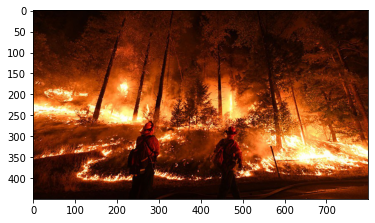

Disaster detected: Wildfire


In [4]:
#img = plt.imshow(load_img("amphan_airport.jpg"))
#plt.title("%s %s" % (list_index[0], predictions_pct[classidx]))
plt.imshow(load_img(prediction_image))

#Ask Kunal iff this line is required
#plt.title("%s" % (classes[list_index[0]]))

plt.show()
print("Disaster detected: " + classes[list_index[0]])